In [2]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("./african_crises.csv")

In [36]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [37]:
df = df.drop("cc3",axis=1)
df = df.replace({'banking_crisis': {'crisis': 1, 'no_crisis': 0}})

In [38]:
df = df.groupby('country').agg({'exch_usd':'mean','inflation_annual_cpi':'mean',
'year':'count',
'systemic_crisis':'sum','domestic_debt_in_default':'sum',
'sovereign_external_debt_default':'sum',
'gdp_weighted_default':'sum',
'independence':'sum',
'currency_crises':'sum',
'inflation_crises':'sum',
'banking_crisis':'sum'})


In [39]:
df.to_csv("african_crisis_new.csv",header=True)

In [40]:
df

,exch_usd,inflation_annual_cpi,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis
country,,,,,,,,,,,
Algeria,20.177565,9.920998,85,4,0,6,1.38,47,9,14,4
Angola,15.099671,152.090470,77,0,12,13,0.00,30,22,26,7
Central African Republic,367.686066,5.849863,58,19,0,33,0.00,55,2,2,19
Egypt,1.006045,4.762431,155,6,0,6,2.40,155,8,11,11
Ivory Coast,153.320635,6.109254,63,4,0,29,0.00,55,1,4,4
Kenya,30.713180,8.725192,67,13,0,6,0.00,52,9,4,8
Mauritius,13.759661,6.854715,68,0,0,0,0.00,52,5,6,1
Morocco,5.865309,8.680358,75,2,0,6,0.78,59,8,10,2
Nigeria,38.951022,14.766862,60,10,0,9,0.00,54,10,12,11


In [72]:

import pandas as pd 
import numpy as np
import os

def showdata2d(XA,data,title,perc):
    #importation de la librairie graphique
    import matplotlib.pyplot as plt

    XAD = pd.DataFrame(XA,index=data.index)
    #préparation du graph:
    fig,ax = plt.subplots(figsize=(12,12))
    ax.plot(XA[:,0],XA[:,1],'or')
    ax.set_xlabel(f"F1 {round(perc[0]*100,2)}")
    ax.set_ylabel(f"F2 {round(perc[1]*100,2)}")
    ax.set_title(title)

    #ajout des labels (noms) :
    for e in data.index:
        ax.text(XAD.loc[e,0],XAD.loc[e,1],e)

    #faire afficher le graph
    plt.show()
    plt.savefig(f'./figures/show2D.png')

def showdata3d(XA,data,title,perc):
    #importation de la librairie graphique
    import matplotlib.pyplot as plt

    XAD = pd.DataFrame(XA,index=data.index)
    #préparation du graph:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d',figsize=(12,12))
    labels = data.index
    for i in range(XA.shape[0]):
        x,y,z = tuple(XA[i,:])
        ax.scatter(x, y, z,label=f'{labels[i]}', marker='o')
    ax.set_xlabel(f"F1 {round(perc[0]*100,2)}")
    ax.set_ylabel(f"F2 {round(perc[1]*100,2)}")
    ax.set_zlabel(f"F3 {round(perc[2]*100,2)}")
    ax.set_title(title)

    fig.legend(bbox_to_anchor=(1.3, 0.8),loc="upper right")
    plt.tight_layout()
    #faire afficher le graph
    plt.show()
    plt.savefig(f'./figures/show3D.png')

def inertie(donnee) :
    sigmas = np.std(donnee,axis=0,ddof=0)
    return np.sum(sigmas**2)

def eboulis(X,eignvs):
    #librairie graphique
    import matplotlib.pyplot as plt
    #préparer le graphique
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,X.shape[1]+1),eignvs,".-")
    ax.set_xlabel("Nb. facteurs")
    ax.set_ylabel("Val. propres")
    plt.title("Eboulis des valeurs propres")
    #rajout du seuil du Kaiser
    ax.plot([1,6],[1,1],"r--",linewidth=1)
    plt.show()
    plt.savefig(f'./figures/EboulisDesValeursPropres.png')
    
def applyPCA(path,index,cols):
    if not str(path).endswith('.csv'):
        raise ValueError
    if index == None : 
        data = pd.read_csv(path,header=None)
    else:
        data = pd.read_csv(path).set_index(index)
    if cols!=None:
        data.columns = cols

    if(not os.path.exists('./figures/')):os.mkdir('./figures/')
    if(not os.path.exists('./results/')):os.mkdir('./results/')
        
    print('Données pures :',data,sep='\n')

    data.dropna(axis=0)
    X = data.values.astype('float64')
    

    R = np.corrcoef(X,rowvar=False)
    print('Matrice de coorélation : ',R,sep='\n')

    eignvs = np.linalg.eigvals(R)
    print('Valeurs propres : ',eignvs,sep='\n')

    #Trouver le nombre de facteurs en utilisant le critère de Kaiser
    q = 0
    for e in eignvs :
        if(e<1):
            break
        q+=1
        
    #Plot de l'eboulis : 
    eboulis(X,eignvs)
    print(f'Le nombre de facteurs est {q}')
        
    #importer la classe de calcul
    #!pip install fanalysis
    from fanalysis.pca import PCA
    acp = PCA(std_unit=True,row_labels=data.index,col_labels=data.columns)
    #lancer les calculs sur les données
    XA = acp.fit_transform(X)[:,:q]
    

    #inertie initiale :
    II = sum(eignvs)
    #inertie de nouveau espace :
    INV = sum(eignvs[:q])

    print('Données transformés : ',pd.DataFrame(XA,index=data.index),sep='\n')
    if(q==1):
        from matplotlib import pyplot as plt
        plt.scatter(XA,[0]*XA.shape[0])
        plt.xlabel(f'F1 {round(eignvs[0]*100/eignvs.sum(),4)}')
        plt.savefig(f'./figures/show1D.png')
    if(q==2):
        showdata2d(XA,data,f'Qualité de la représentation : {round((INV/II)*100,2)}%',[eignvs[0]/sum(eignvs),eignvs[1]/sum(eignvs)])

    if(q==3):
        showdata3d(XA,data,f'Qualité de la représentation : {round((INV/II)*100,2)}%',[eignvs[0]/sum(eignvs),eignvs[1]/sum(eignvs),eignvs[2]/sum(eignvs)])
    if(q>3):
        print('Dimension supérieur à 3, on peut pas visualiser le graph, des visualisations 2D-3D peuvent être faites...')

    #Contribution des individus dans les différents facteurs : 
    lig_ctr=acp.row_contrib_[:,:q]
    print('Contributions des individus par facteur : ',pd.DataFrame(lig_ctr,index=data.index),sep="\n")

    for j in range(0,q):
        print(f'Contributions des individus au facteur {j}')
        acp.plot_row_contrib(num_axis=j,nb_values=X.shape[0])
        plt.savefig(f'./figures/Contributions des individus au facteur {j}.png')

    #Contribution des variables dans les différents facteurs : 
    col_ctr=acp.col_contrib_[:,:q]
    print('Contributions des variables par facteur : ',pd.DataFrame(col_ctr,index=data.columns),sep="\n")

    for j in range(0,q):
        print(f'Contributions des variables au facteur {j}')
        acp.plot_col_contrib(num_axis=j,nb_values=X.shape[1])
        plt.savefig(f'./figures/Contributions des variables au facteur {j}.png')

    #Cercle de corrolation des variables : 
    ploted = []
    for j in range(0,q):
        for i in range(0,q):
            if i!=j and f"{j},{i}" not in ploted and f"{i},{j}" not in ploted :
                print(f'Cercle de corrélation des facteurs {j} et {i}')
                acp.correlation_circle(num_x_axis=i,num_y_axis=j,figsize=(12,12))
                plt.savefig(f'./figures/Cercle de corrélation des facteurs {j} et {i}.png')
                ploted.append(f"{j},{i}")

Données pures :
                            exch_usd  inflation_annual_cpi  year  \
country                                                            
Algeria                    20.177565              9.920998    85   
Angola                     15.099671            152.090470    77   
Central African Republic  367.686066              5.849863    58   
Egypt                       1.006045              4.762431   155   
Ivory Coast               153.320635              6.109254    63   
Kenya                      30.713180              8.725192    67   
Mauritius                  13.759661              6.854715    68   
Morocco                     5.865309              8.680358    75   
Nigeria                    38.951022             14.766862    60   
South Africa                1.719339              5.190383   114   
Tunisia                    50.692807              9.291669    75   
Zambia                      1.116342             21.997512    72   
Zimbabwe                   20.20

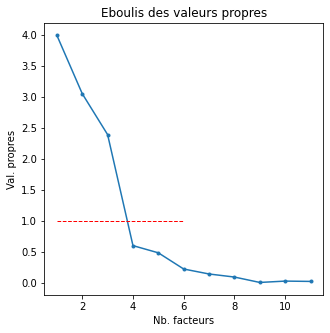

Le nombre de facteurs est 3
Données transformés : 
                                 0         1         2
country                                               
Algeria                  -1.175915  0.192882 -0.418525
Angola                    0.588644  2.399819 -1.697025
Central African Republic  3.526065 -3.552521  1.616002
Egypt                    -2.866108  0.600196  3.866797
Ivory Coast               0.719610 -2.078443 -0.529915
Kenya                     0.341168 -0.985107 -0.401143
Mauritius                -1.276320 -0.693985 -1.645715
Morocco                  -1.278125 -0.150614 -0.873829
Nigeria                   0.663060 -0.483279 -0.551235
South Africa             -2.734007  0.408824  1.189025
Tunisia                  -0.559110 -0.435152 -0.587389
Zambia                   -0.119556  1.145721 -1.478421
Zimbabwe                  4.170593  3.631660  1.511374


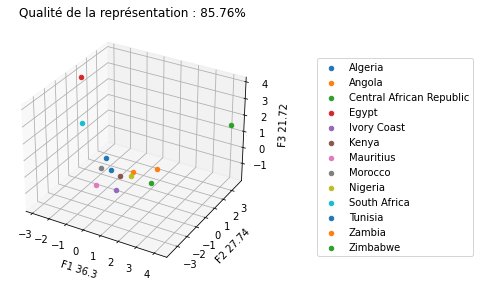

Contributions des individus par facteur : 
                                  0          1          2
country                                                  
Algeria                    2.663847   0.093798   0.563860
Angola                     0.667518  14.520039   9.270559
Central African Republic  23.951788  31.818830   8.406458
Egypt                     15.824949   0.908233  48.131773
Ivory Coast                0.997590  10.891489   0.903945
Kenya                      0.224230   2.446685   0.517997
Mauritius                  3.138167   1.214258   8.718429
Morocco                    3.147053   0.057193   2.458003
Nigeria                    0.846961   0.588853   0.978145
South Africa              14.399800   0.421390   4.551043
Tunisia                    0.602216   0.477412   1.110658
Zambia                     0.027536   3.309547   7.035990
Zimbabwe                  33.508345  33.252273   7.353140
Contributions des individus au facteur 0


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:541: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(self.row_labels_)[np.argsort(contribs)]\


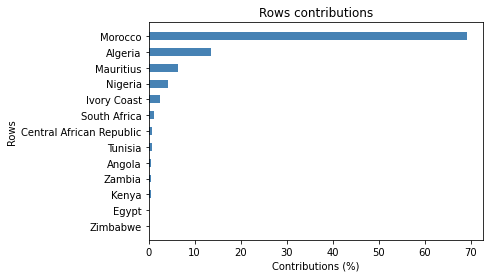

Contributions des individus au facteur 1


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:541: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(self.row_labels_)[np.argsort(contribs)]\


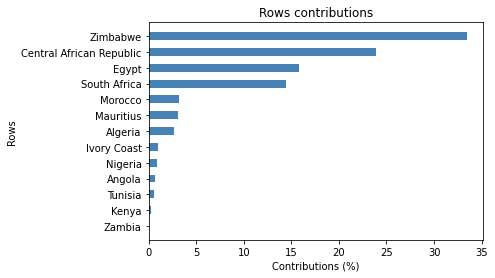

Contributions des individus au facteur 2


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:541: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(self.row_labels_)[np.argsort(contribs)]\


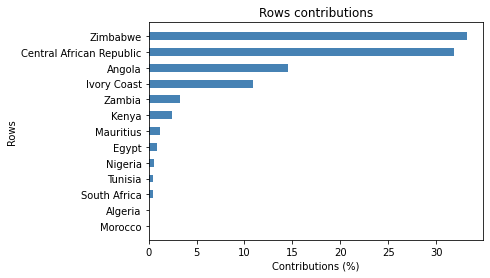

Contributions des variables par facteur : 
                                         0          1          2
exch_usd                          8.125147  16.707999   1.920998
inflation_annual_cpi              9.093724  11.817951   3.328733
year                              7.200200   5.019207  22.574115
systemic_crisis                  14.344352   1.936007   7.912657
domestic_debt_in_default          9.280395  17.262373   0.925222
sovereign_external_debt_default  17.479065   0.558667   2.700194
gdp_weighted_default             12.707714   0.465152  16.241818
independence                      8.135006   0.001471  26.099248
currency_crises                   0.230683  25.975263   0.547339
inflation_crises                  0.893084  20.114408   2.744853
banking_crisis                   12.510631   0.141502  15.004823
Contributions des variables au facteur 0


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:602: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(col_labels)[np.argsort(contribs)][limit:n_cols]


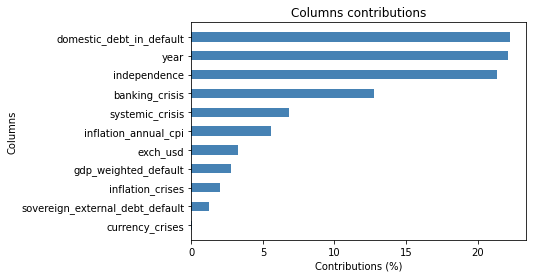

Contributions des variables au facteur 1


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:602: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(col_labels)[np.argsort(contribs)][limit:n_cols]


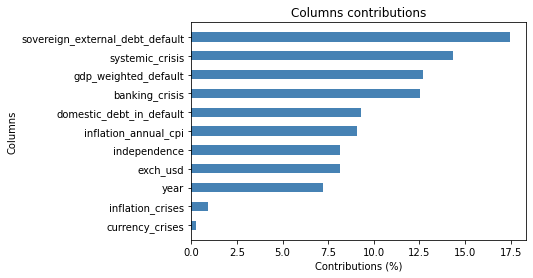

Contributions des variables au facteur 2


c:\Users\eljao\AppData\Local\Programs\Python\Python310\lib\site-packages\fanalysis\base.py:602: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels = pd.Series(col_labels)[np.argsort(contribs)][limit:n_cols]


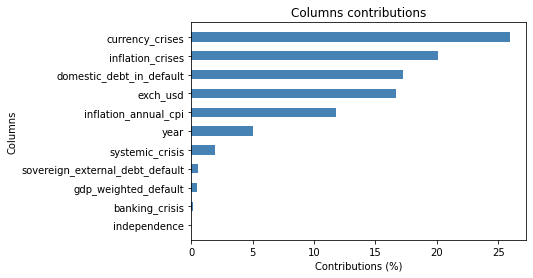

Cercle de corrélation des facteurs 0 et 1


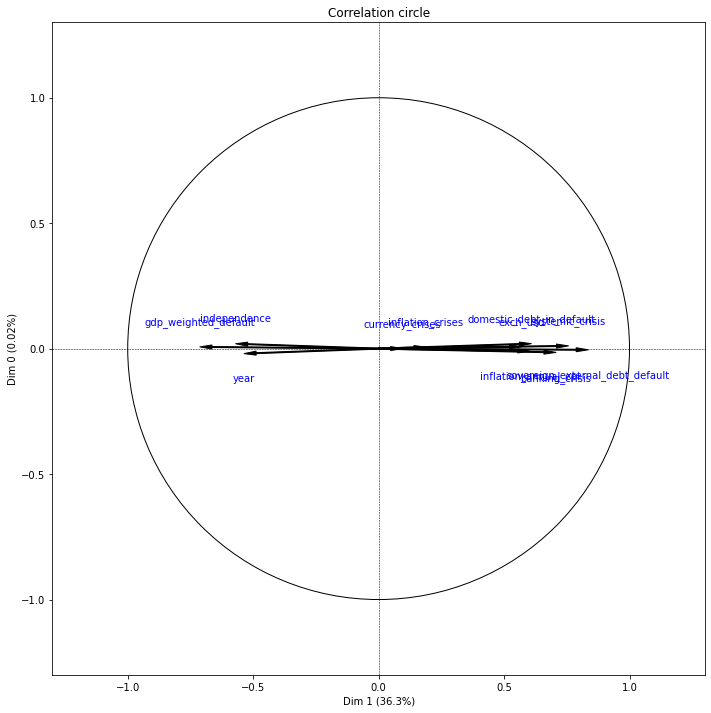

Cercle de corrélation des facteurs 0 et 2


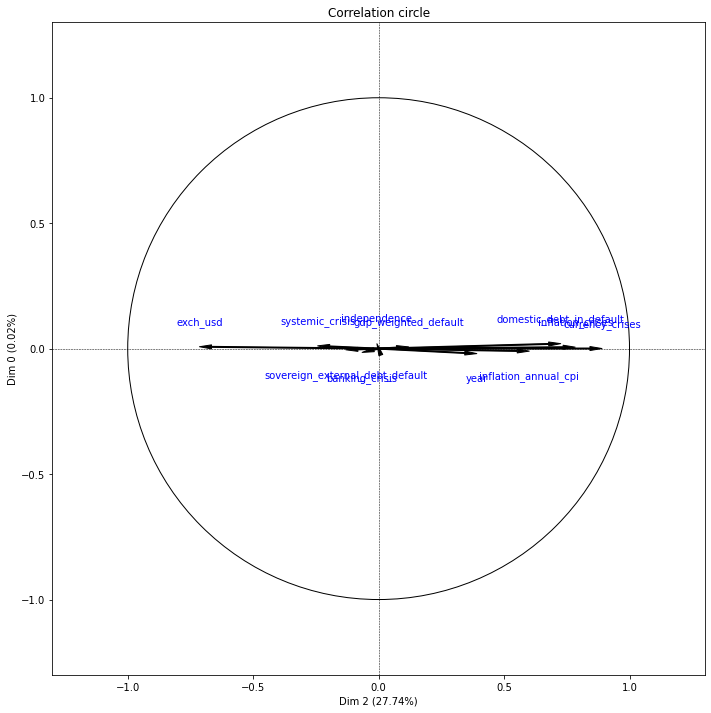

Cercle de corrélation des facteurs 1 et 2


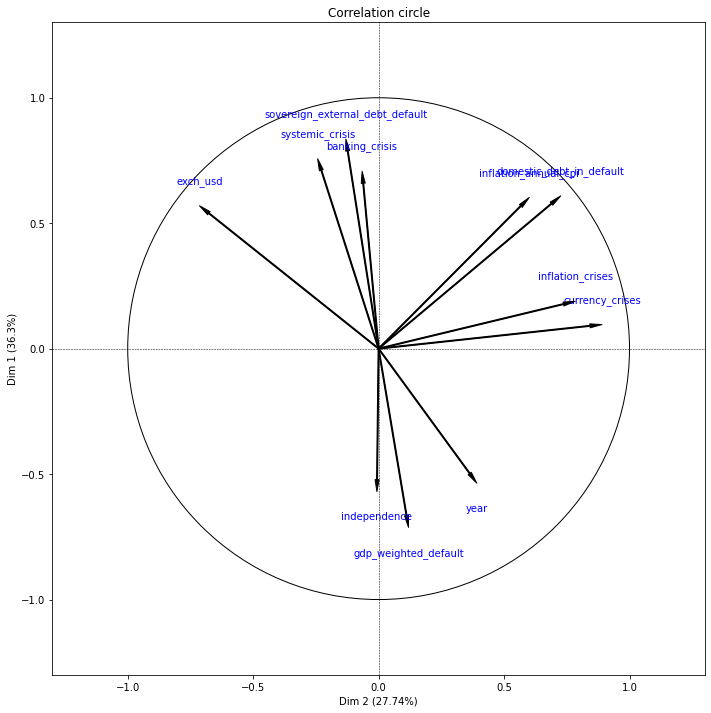

In [73]:
col = ["exch_usd","inflation_annual_cpi","nbr_years","systemic_crisis","domestic_debt_in_default","sovereign_external_debt_default","gdp_weighted_default","independence","currency_crises","inflation_crises","banking_crisis"]
applyPCA("./african_crisis_new.csv","country",col)